In [1]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=79463e10d1f38c13df0aeaf63a9d8b52a983488fa23d4e7a1a9db774e3a2a606
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
from PIL import Image, ImageDraw
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition
import pandas as pd

In [3]:
from google. colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
from google.colab.patches import cv2_imshow

Name of Students:  ['Giresh', 'Meet', 'Ajinakya', 'Yash', 'Suyash', 'Sumedh', 'Aniket', 'Shreyash']
: Present
Meet: Present
Giresh: Present
Sumedh: Present
Shreyash: Present
Aniket: Present
Ajinakya: Present


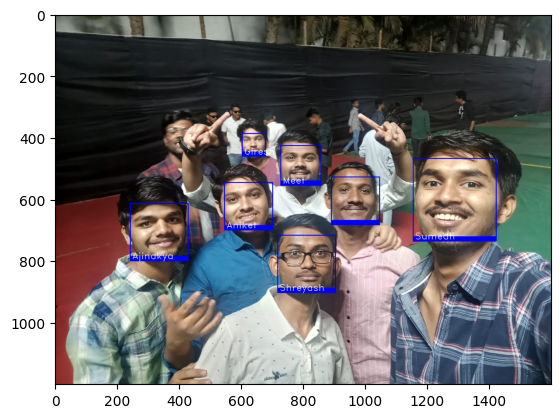

In [8]:
import cv2
import numpy as np
import os

path = "/content/gdrive/MyDrive/face-recognition-python-code/Train/"

known_names = []
known_name_encodings = []
attendance = {}
recognized_names = []
images = os.listdir(path)
for _ in images:
    image = face_recognition.load_image_file(path + _)
    image_path = path + _
    encoding = face_recognition.face_encodings(image)[0]

    known_name_encodings.append(encoding)
    known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

print("Name of Students: ",known_names)

test_image = "/content/gdrive/My Drive/face-recognition-python-code/Test/1.jpg"
image = cv2.imread(test_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

face_locations = face_recognition.face_locations(image)
face_encodings = face_recognition.face_encodings(image, face_locations)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_name_encodings, face_encoding)
    name = ""

    face_distances = face_recognition.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

    if matches[best_match]:
        name = known_names[best_match]

    attendance[name] = "Present"
    recognized_names.append(name)

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

for student, status in attendance.items():
      print(f"{student}: {status}")


# Fill absent students' attendance as "Absent"
attendance_df = pd.DataFrame({"Name": known_names, "Attendance": ["Present" if name in recognized_names else "Absent" for name in known_names]})

# Save the attendance record to Excel
attendance_df.to_excel("attendance.xlsx", index=False)

#plt.imshow("Result", image)
plt.imshow(image, aspect='auto')
cv2.imwrite("./output.jpg", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
print("Name","Attendance",known_names, ["Present" if name in recognized_names else "Absent" for name in known_names])

Name Attendance ['Giresh', 'Meet', 'Ajinakya', 'Yash', 'Suyash', 'Sumedh', 'Aniket', 'Shreyash'] ['Present', 'Present', 'Present', 'Absent', 'Absent', 'Present', 'Present', 'Present']


In [10]:
from tabulate import tabulate

# Create a list of lists to hold the attendance data
attendance_data = []
for name in known_names:
    attendance_data.append([name, "Present" if name in recognized_names else "Absent"])

# Print the attendance data in tabular format
print(tabulate(attendance_data, headers=["Name", "Attendance"], tablefmt="grid"))


+----------+--------------+
| Name     | Attendance   |
+==========+==============+
| Giresh   | Present      |
+----------+--------------+
| Meet     | Present      |
+----------+--------------+
| Ajinakya | Present      |
+----------+--------------+
| Yash     | Absent       |
+----------+--------------+
| Suyash   | Absent       |
+----------+--------------+
| Sumedh   | Present      |
+----------+--------------+
| Aniket   | Present      |
+----------+--------------+
| Shreyash | Present      |
+----------+--------------+
